In [1]:
import process as process
from models.Lorenz63 import lorenz63_dxdt
from random_variables import GaussianRV, RV
import numpy as np
import matplotlib.pyplot as plt

In [2]:
h = process.fixed_linear_operator(np.eye(3))

nx = 3
dt = 0.01
dk = 10

f = process.operators_from_autonomous_ODE(lorenz63_dxdt, nx, dt, dk)
r = process.gaussian_constant_noise(0, np.eye(3))
q = process.gaussian_constant_noise(0, np.eye(3))
X0 = GaussianRV(1, 0.01*np.eye(3))
ncy = 250

true_process = process.Process(ncy, X0, f, q, h, r)

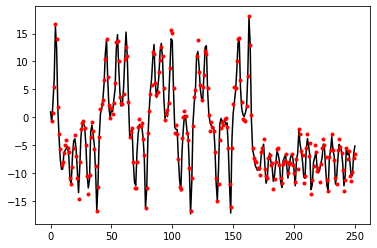

In [3]:
import da_tools.simulate as simulate

xt, y = simulate.simulate_truth_and_obs(true_process)

plt.plot(xt[0, :], 'k-')
plt.plot(y[0, :], 'r.')

In [ ]:
from da_tools.tempered_PF import tempered_PF

ne = 20
tpf = tempered_PF(ne)

xf, xa = tpf(true_process, y)

In [12]:
from da_tools.EnKF import EnKF

ne = 500
enkf = EnKF(ne)

xf, xa = enkf(true_process, y)

In [15]:
from da_tools.ETPF import ETPF

ne = 500
etpf = ETPF(ne)

xf, xa = etpf(true_process, y)

In [8]:
%matplotlib qt
for i in range(ne):
    plt.plot(xa[0, i, :], '0.5')
plt.plot(np.mean(xa[0, :, :], axis=0))
plt.plot(xt[0, :], 'k-')
plt.plot(y[0, :], 'r.')

In [16]:
import tools.diagnostics as diag
RMSE = diag.ensemble_time_series_RMSE(xa, xt)
cove = diag.ensemble_time_series_coverage(xa, xt)

print(RMSE, cove)

(3, 251) (3, 3, 251)
0.7893505699027673 0.900398406374502
